In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
 
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables


['measurement', 'station']

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# View all of the classes that automap found
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(0, 'USC00519397', '2010-01-01', 2.0, 18.3),
 (1, 'USC00519397', '2010-01-02', 0.0, 17.2),
 (2, 'USC00519397', '2010-01-03', 0.0, 23.3),
 (3, 'USC00519397', '2010-01-04', 0.0, 24.4),
 (4, 'USC00519397', '2010-01-06', None, 22.8)]

In [10]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 0.914),
 (1, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 4.45),
 (2, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 2.133),
 (3, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 3.627),
 (4, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 93.447),
 (5, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 5.943),
 (6, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84889, 10.027),
 (7, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.274),
 (8, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 46.449)]

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
lastest_date =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is {lastest_date}.")

The most recent date in the data set is ('2017-08-23',).


In [14]:
# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

In [15]:
# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago_date).all()

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_scores, columns=['date', 'precipitation scores'])
df.set_index('date', inplace=True)

In [17]:
df.head(10)

,precipitation scores
date,
2016-08-23,0.0
2016-08-24,2.0
2016-08-25,2.0
2016-08-26,0.0
2016-08-27,0.0
2016-08-28,0.3
2016-08-29,0.0
2016-08-30,0.0
2016-08-31,3.3


In [18]:
#df['precipitation scores']=df['precipitation scores']*100

In [19]:
df.head()

,precipitation scores
date,
2016-08-23,0.0
2016-08-24,2.0
2016-08-25,2.0
2016-08-26,0.0
2016-08-27,0.0


<AxesSubplot:xlabel='date'>

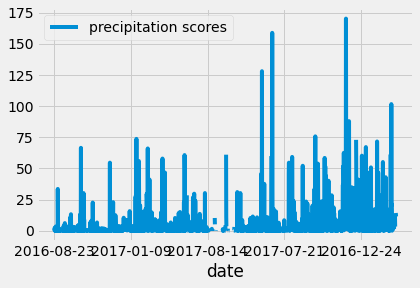

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
total= session.query(Station.station).distinct().count()
print(f"The total number of the stations is {total}.")

The total number of the stations is 9.


In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)



most_active_station = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station
active_station_id = most_active_station[0]

In [24]:
active_station_id

'USC00519281'

In [25]:
# List the stations and the counts in descending order.
station_query= session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station== active_station_id).all()

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [28]:
tobs_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= year_ago_date).all()

In [29]:
tobs_pf=pd.DataFrame(tobs_results,columns=['date', 'temperature observation'])

tobs_pf.set_index('date', inplace=True)

In [30]:
tobs_pf.head()

,temperature observation
date,
2016-08-23,27.2
2016-08-24,26.1
2016-08-25,26.7
2016-08-26,26.1
2016-08-27,25.0


Text(0.5, 1.0, 'Temperature Analysis of the Busiest Station')

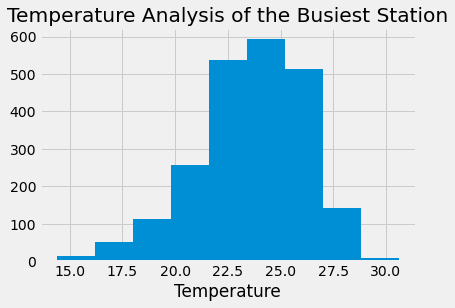

In [31]:
plt.hist(tobs_pf['temperature observation'],bins=9)
plt.xlabel ("Temperature")

plt.title("Temperature Analysis of the Busiest Station")

# Close session

In [32]:
# Close Session
session.close()